#  Customer Churn Analytics and Predictive Modeling

# Data Import

In [373]:
# Import all the necessory libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
%matplotlib inline

import seaborn as sns#visualization
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
import warnings
warnings.filterwarnings("ignore")

In [374]:
data = pd.read_csv(r"C:\Users\thora\Course Work\Marketing_Analysis_DAB303\Lab\Project 1\E-Commerce Churn Data.csv")

In [375]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# Data Overview

In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [378]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In [379]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

# Data Cleaning

#### For Data cleaning we have mainly followed following three steps
##### 1. Replacing different named data entries with one common name
##### 2. Identify and replace null values (based on data type and skweness observed)
##### 3. Identify outlier fields in the data

### 1. Replace "credit card" with "cc" in the 'PreferredPaymentMode' column and Cash on Delivery to COD 

In [383]:
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace('Credit Card', 'CC')
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace('Cash on Delivery', 'COD')
# Check if the replacement worked
print(data['PreferredPaymentMode'].unique())

['Debit Card' 'UPI' 'CC' 'COD' 'E wallet']


### 2. Replace "mobile phone" with "mobile" in the 'PreferredLoginDevice' column

In [385]:
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')
# Check if the replacement worked
print(data['PreferredLoginDevice'].unique())

['Mobile Phone' 'Computer']


### 3. Replace "mobile" with "mobile  phone" in the 'PreferedOrderCategory' column

In [387]:
data['PreferedOrderCat'] = data['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
# Check if the replacement worked
print(data['PreferedOrderCat'].unique())

['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']


### 4. Analyzing Skewness in Null Value Columns for Optimal Imputation Strategies

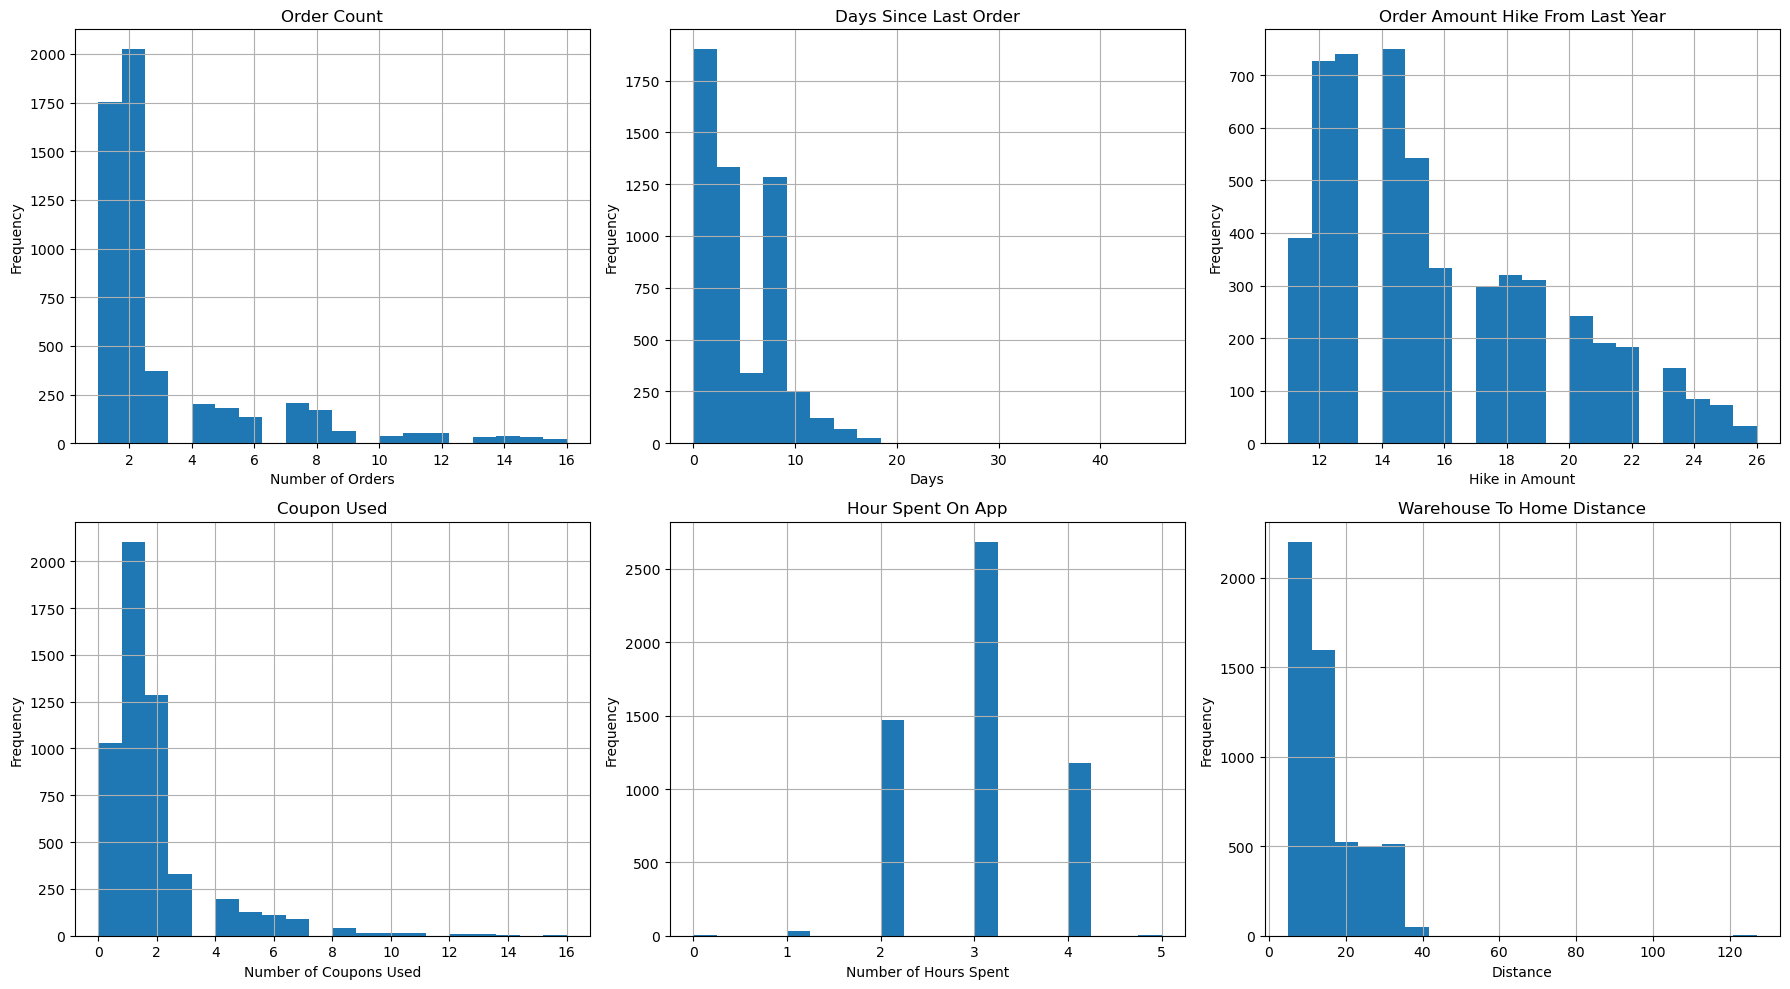

In [389]:
import matplotlib.pyplot as plt

# Function to plot histograms
def plot_histogram(ax, column, title, xlabel, ylabel):
    data[column].dropna().hist(bins=20, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# Create a 2x3 grid for the plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

# List of parameters for each plot
plot_params = [
    ('OrderCount', 'Order Count', 'Number of Orders', 'Frequency'),
    ('DaySinceLastOrder', 'Days Since Last Order', 'Days', 'Frequency'),
    ('OrderAmountHikeFromlastYear', 'Order Amount Hike From Last Year', 'Hike in Amount', 'Frequency'),
    ('CouponUsed', 'Coupon Used', 'Number of Coupons Used', 'Frequency'),
    ('HourSpendOnApp', 'Hour Spent On App', 'Number of Hours Spent', 'Frequency'),
    ('WarehouseToHome', 'Warehouse To Home Distance', 'Distance', 'Frequency')
]

# Loop through the parameters and plot each in the grid
for ax, params in zip(axes.flatten(), plot_params):
    plot_histogram(ax, *params)

# Adjust layout
plt.tight_layout()
plt.show()

### 5. Replacing Null Values of respective columns

In [391]:
import pandas as pd

# Replace null values in the specified columns with the respective strategy
def replace_nulls(data):
    data['Tenure'].fillna(data['Tenure'].median(), inplace=True)  # Replace with median
    data['WarehouseToHome'].fillna(data['WarehouseToHome'].mode()[0], inplace=True)  # Replace with mode
    data['HourSpendOnApp'].fillna(data['HourSpendOnApp'].mode()[0], inplace=True)  # Replace with mode
    data['OrderAmountHikeFromlastYear'].fillna(data['OrderAmountHikeFromlastYear'].median(), inplace=True)  # Replace with median
    data['CouponUsed'].fillna(data['CouponUsed'].mode()[0], inplace=True)  # Replace with mode
    data['OrderCount'].fillna(data['OrderCount'].mode()[0], inplace=True)  # Replace with mode
    data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].median(), inplace=True)  # Replace with median

replace_nulls(data)

# Check the result
print(data.isnull().sum())  # To verify that no null values remain in the specified columns

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


### 6. Outlier fields in the data

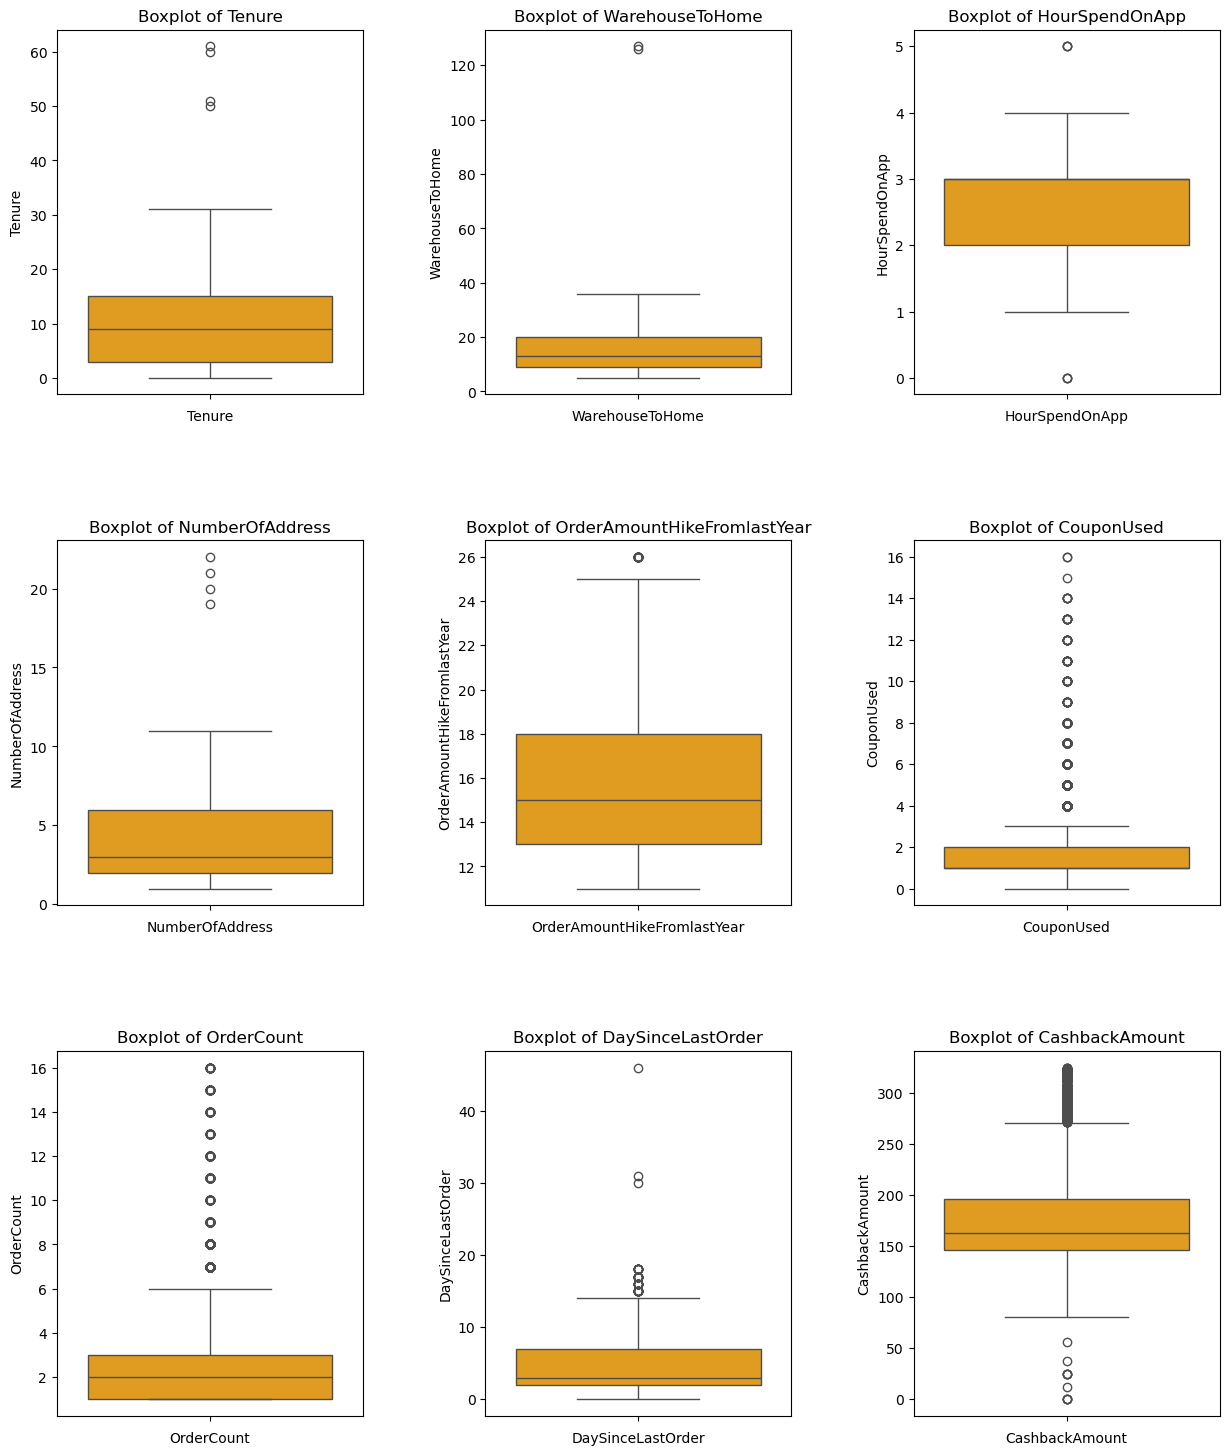

In [393]:
# List of numeric columns to check for outliers
numeric_columns = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 
    'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

# Calculate number of rows needed (3 plots per row)
num_cols = 3
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols  # This ensures you have enough rows for all plots

# Set up the figure grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot boxplots for each numeric variable
for i, col in enumerate(numeric_columns):
    row, col_pos = divmod(i, num_cols)
    sns.boxplot(data=data[col], ax=axes[row, col_pos], color='orange')
    axes[row, col_pos].set_title(f'Boxplot of {col}')
    axes[row, col_pos].set_xlabel(col)

# Hide any unused subplots
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()


# Exploratory Data Analysis

#### We have plotted six different graphs to understand underlaying patterns in the data. 
#### Three important steps followed in the EDA is as following. 

##### A. Variable distribution in churn and non-churn category
##### B. Create visuals using python package
##### C. Variable summary


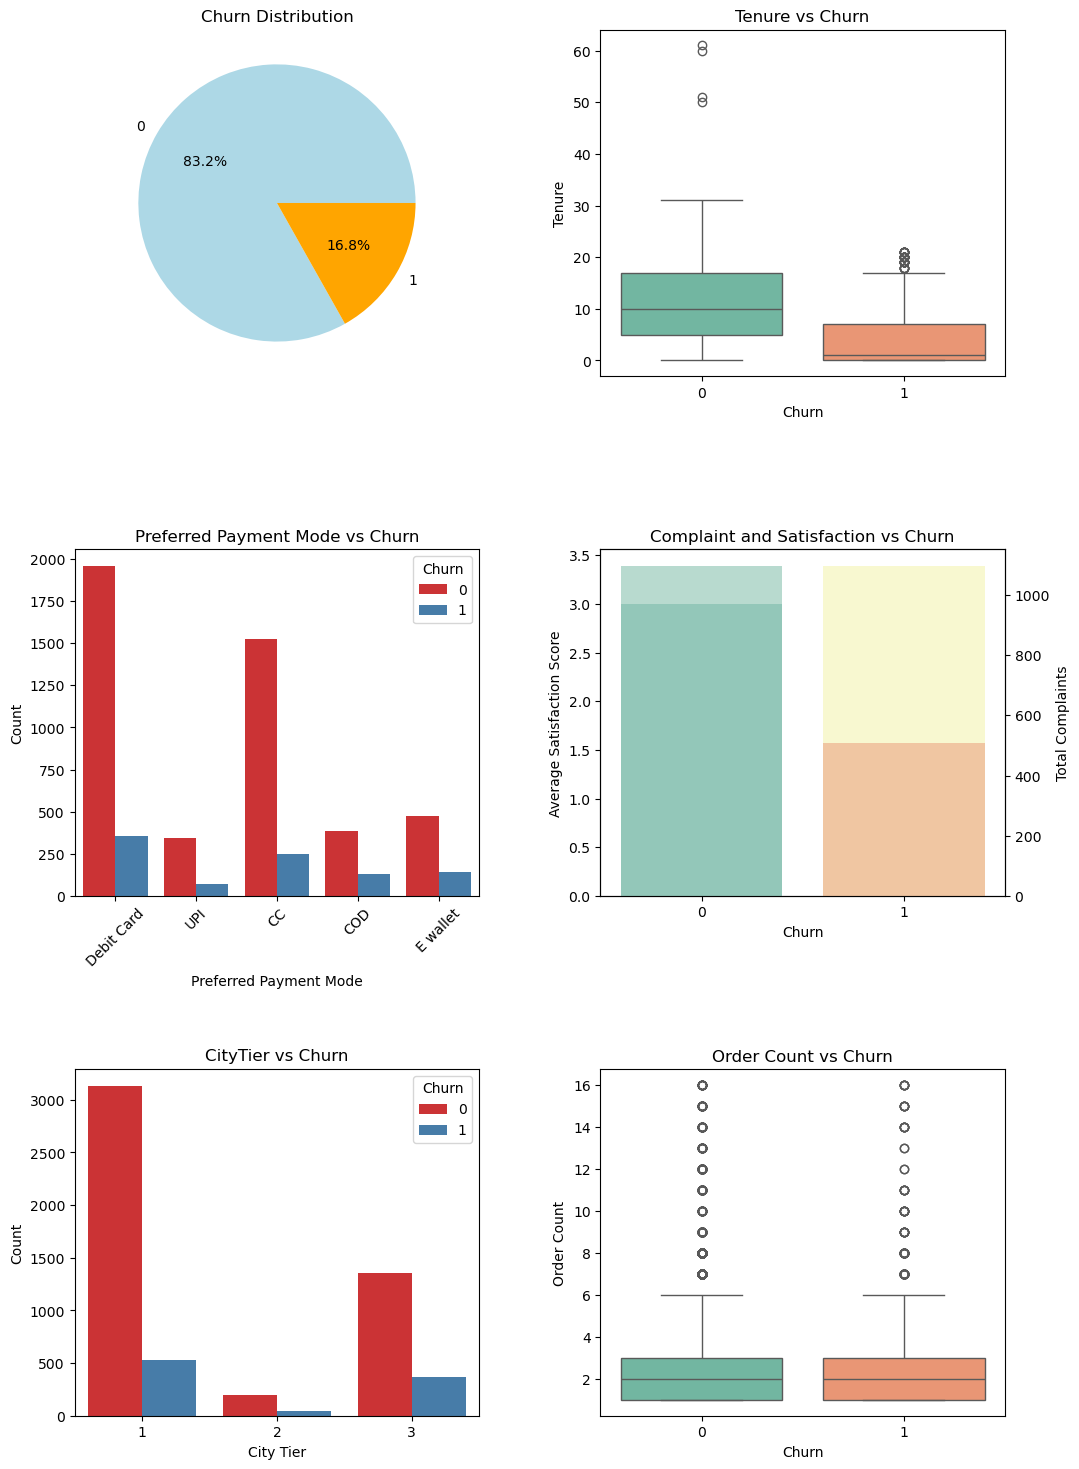

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure grid: 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # Adjusted the figure size for better layout
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Plot 1: Churn Distribution (Pie Chart)
data['Churn'].value_counts().plot.pie(ax=axes[0, 0], autopct='%1.1f%%', colors=['lightblue', 'orange'])
axes[0, 0].set_title('Churn Distribution')
axes[0, 0].set_ylabel('')

# Plot 2: Tenure vs. Churn (Boxplot)
sns.boxplot(x='Churn', y='Tenure', data=data, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Tenure vs Churn')
axes[0, 1].set_xlabel('Churn')
axes[0, 1].set_ylabel('Tenure')

# Plot 3: Preferred Payment Mode vs. Churn (Bar Chart)
sns.countplot(x='PreferredPaymentMode', hue='Churn', data=data, ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title('Preferred Payment Mode vs Churn')
axes[1, 0].set_xlabel('Preferred Payment Mode')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Complaint and Satisfaction vs. Churn (Bar Plot)
satisfaction_means = data.groupby('Churn')['SatisfactionScore'].mean().reset_index()
complain_counts = data.groupby('Churn')['Complain'].sum().reset_index()

# Creating a twin axis for overlaying the bar plots
ax1 = sns.barplot(x='Churn', y='SatisfactionScore', data=satisfaction_means, ax=axes[1, 1], palette='Set3', alpha=0.7)
ax2 = ax1.twinx()
sns.barplot(x='Churn', y='Complain', data=complain_counts, ax=ax2, palette='Set2', alpha=0.5)

ax1.set_title('Complaint and Satisfaction vs Churn')
ax1.set_xlabel('Churn')
ax1.set_ylabel('Average Satisfaction Score')
ax2.set_ylabel('Total Complaints')

# Plot 5: CityTier vs. Churn (Stacked Bar Chart)
sns.countplot(x='CityTier', hue='Churn', data=data, ax=axes[2, 0], palette='Set1')
axes[2, 0].set_title('CityTier vs Churn')
axes[2, 0].set_xlabel('City Tier')
axes[2, 0].set_ylabel('Count')

# Plot 6: Order Count vs. Churn (Boxplot)
sns.boxplot(x='Churn', y='OrderCount', data=data, ax=axes[2, 1], palette='Set2')
axes[2, 1].set_title('Order Count vs Churn')
axes[2, 1].set_xlabel('Churn')
axes[2, 1].set_ylabel('Order Count')

# Display the plots
plt.show()

# Correlation Matrix

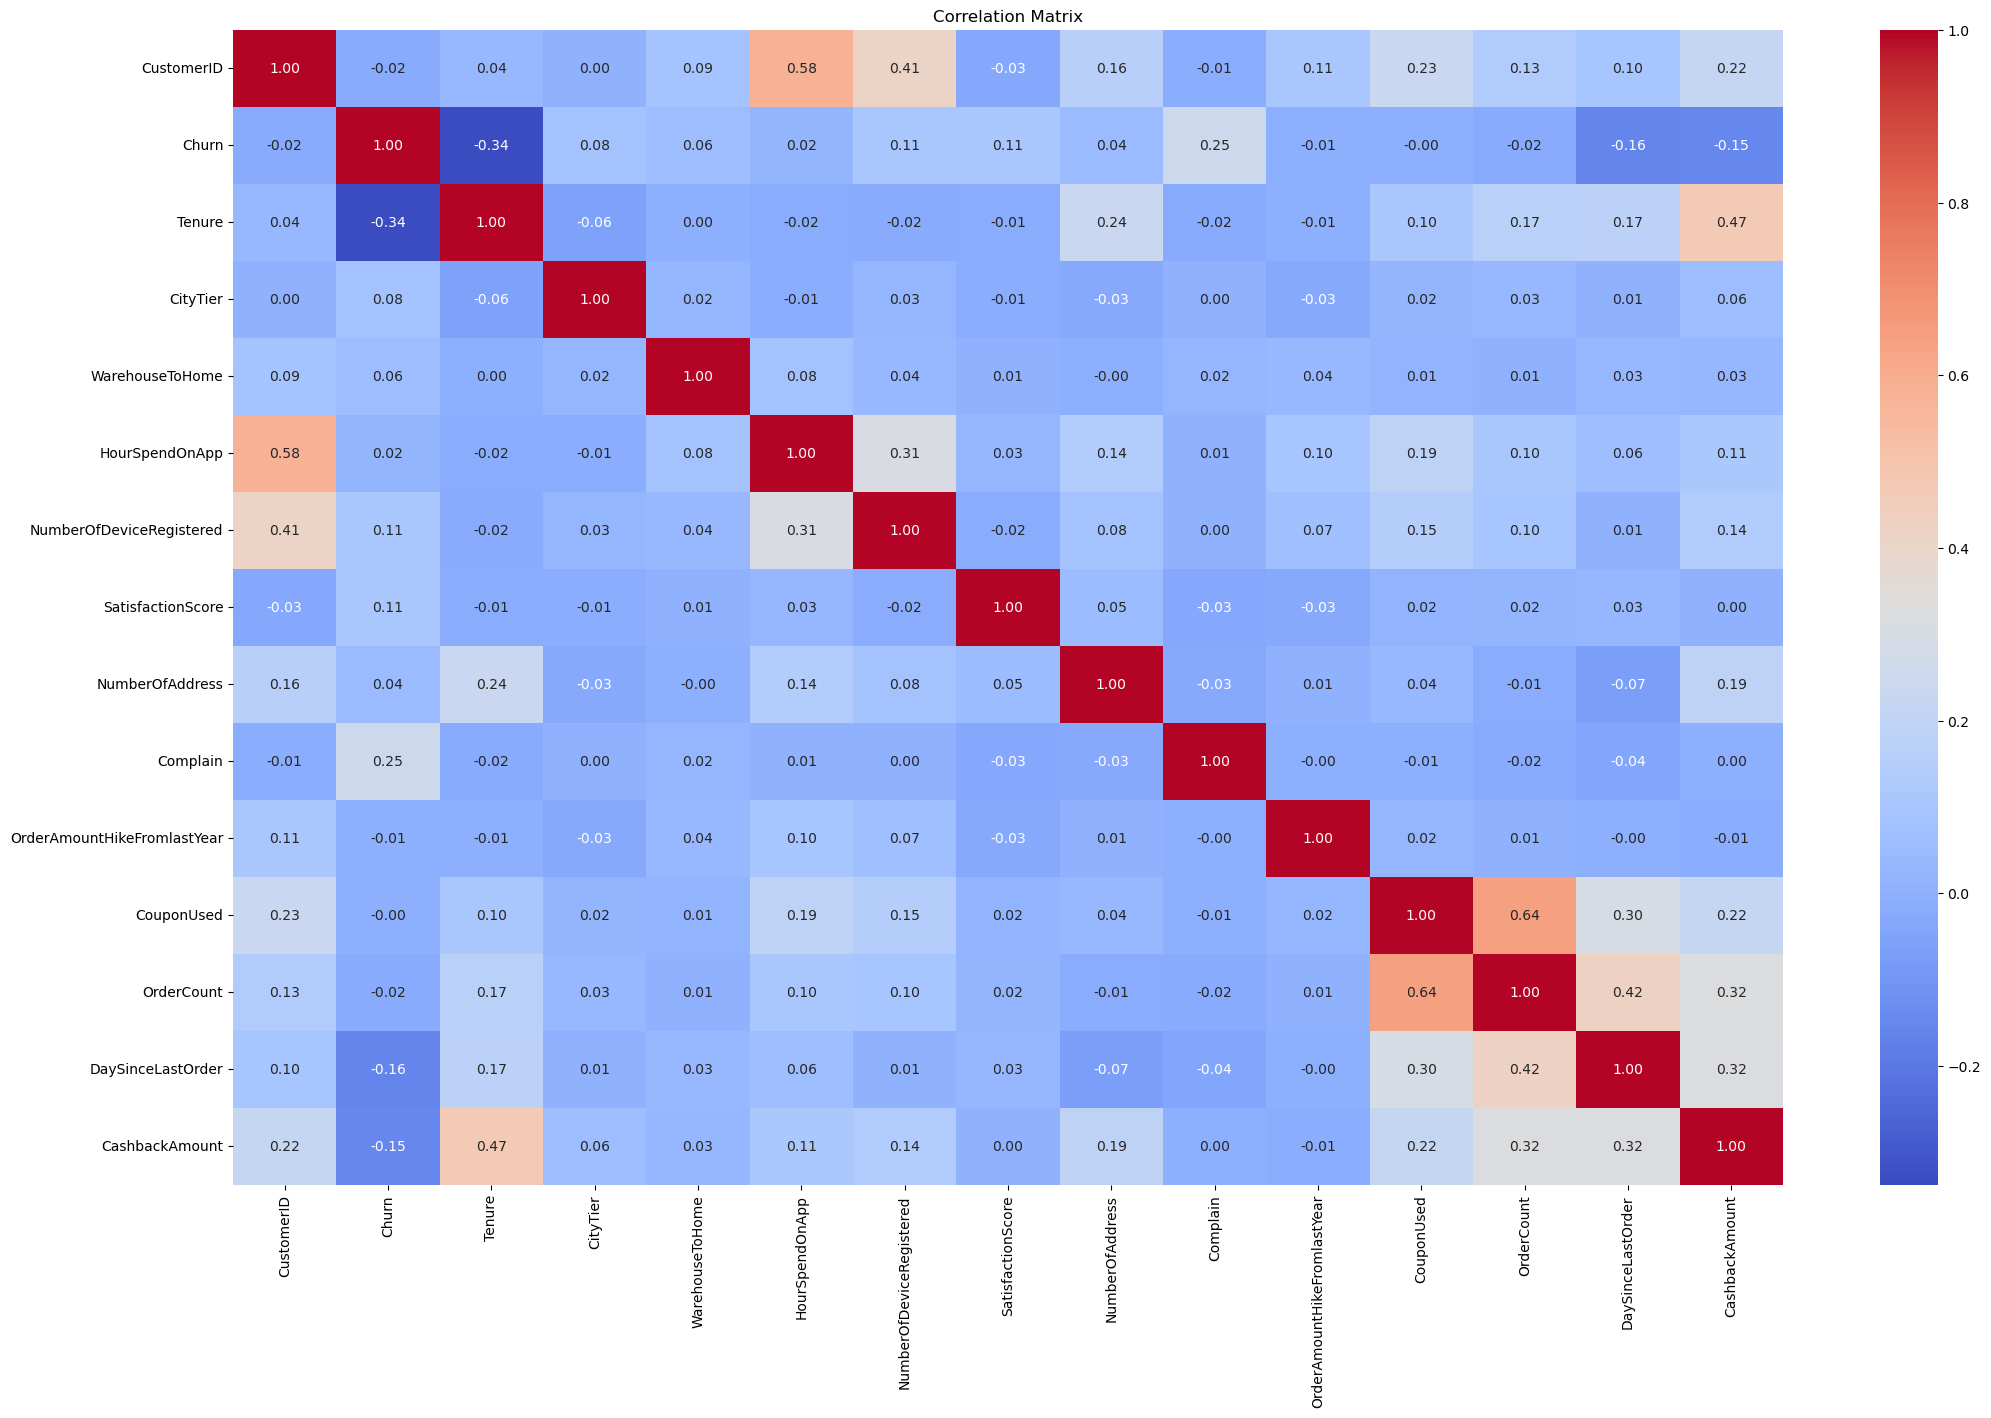

In [398]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing for Model Building

<Axes: >

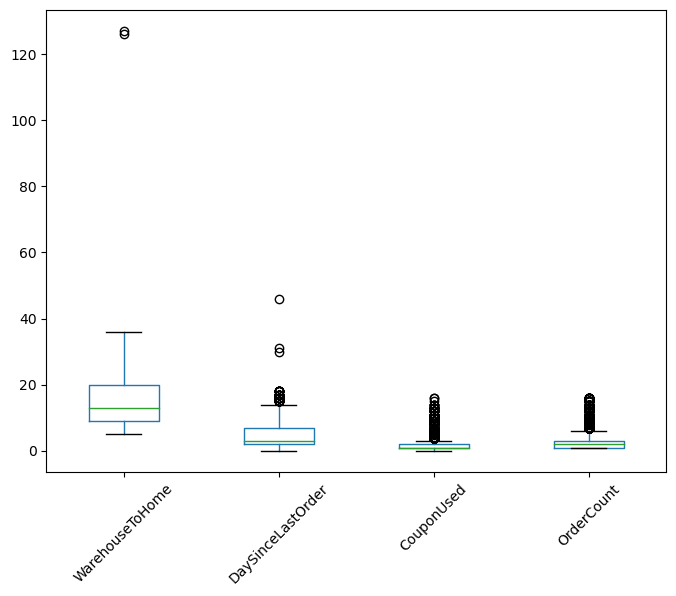

In [400]:
data.boxplot(column=[ 'WarehouseToHome','DaySinceLastOrder','CouponUsed','OrderCount'],
                     rot = 45, grid = False, figsize=(8,6))

In [401]:
q1_home = data['WarehouseToHome'].quantile(0.25)
q3_home = data['WarehouseToHome'].quantile(0.75)

q1_order = data['DaySinceLastOrder'].quantile(0.25)
q3_order = data['DaySinceLastOrder'].quantile(0.75)

q1_used = data['CouponUsed'].quantile(0.25)
q3_used = data['CouponUsed'].quantile(0.75)

q1_count = data['OrderCount'].quantile(0.25)
q3_count = data['OrderCount'].quantile(0.75)

In [402]:
IQR_home = q3_home - q1_home
IQR_order = q3_order - q1_order
IQR_used = q3_used - q1_used
IQR_count = q3_count - q1_count

In [403]:
Column_name = ['DaySinceLastOrder'],['WarehouseToHome'],['CouponUsed'],['OrderCount']
def calculate_limits(q1, q3, IQR,Column_name):
    upper_limit = q3 + (1.5 * IQR)
    lower_limit = q1 - (1.5 * IQR)
    print(f"Upper limit for {Column_name}: {upper_limit}")
    print(f"Lower limit for {Column_name}: {lower_limit}")


calculate_limits(q1_home, q3_home, IQR_home, "WarehouseToHome")
calculate_limits(q1_order, q3_order, IQR_order, "DaySinceLastOrder")
calculate_limits(q1_used, q3_used, IQR_used, "CouponUsed")
calculate_limits(q1_count, q3_count, IQR_count, "OrderCount")

Upper limit for WarehouseToHome: 36.5
Lower limit for WarehouseToHome: -7.5
Upper limit for DaySinceLastOrder: 14.5
Lower limit for DaySinceLastOrder: -5.5
Upper limit for CouponUsed: 3.5
Lower limit for CouponUsed: -0.5
Upper limit for OrderCount: 6.0
Lower limit for OrderCount: -2.0


# Baseline Model

In [405]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [406]:
data_num = data[['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
                 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain',
                 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                 'DaySinceLastOrder', 'CashbackAmount']]

In [407]:
X_baseline = data.drop('Churn', axis=1)

In [408]:
y_baseline = data_num[['Churn']]
print(X_baseline.shape, y_baseline.shape)

(5630, 19) (5630, 1)


In [409]:
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, test_size = 0.20, random_state = 42)

# Model 1. Decision Tree

### In DT model we have followed the following steps:
1. Trained DT model on E-commerce data and predicted customer churn on test data
2. Checked Accuracy of the model
3. Feature importance
4. Customer Segmentation for Churn Prediction
5. Predictive Analysis of Customer Churn Characteristics using DT model
6. Store Data from DT model for churn prediction in CSV file
7. Visualization of Churn Prediction

#### 1. Trained DT model on E-commerce data and predicted customer churn on test data

In [498]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X_baseline is a pandas DataFrame
X_encoded = pd.get_dummies(X_baseline, drop_first=True)  # This converts categorical columns to numeric

# Step 2: Define the decision tree classifier and parameter grid
final_tree_model = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Step 3: Perform the grid search with cross-validation
grid_search = GridSearchCV(final_tree_model, param_grid, cv=5)
grid_search.fit(X_encoded, y_baseline)

# Step 4: Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 0}


In [499]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree model
final_tree_model = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')

# Fit the model on the encoded data
final_tree_model.fit(X_encoded, y_baseline)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=42)

In [500]:
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_encoded, y_baseline, test_size = 0.20, random_state = 42)

#### 2. Check Accuracy of the model

In [502]:
from sklearn.metrics import accuracy_score
y_pred = final_tree_model.predict(X_test_baseline)  # Pass the test data here, not the model
accuracy = round(accuracy_score(y_test_baseline, y_pred) * 100, 2)

# Print the accuracy score
print("Accuracy Score:", accuracy, "%")

Accuracy Score: 92.18 %


In this case, the output Accuracy Score : 92.18 % means that the decision tree model correctly predicted the labels for 92.18 % of the test data. This indicates a relatively high level of accuracy for the model’s predictions.

In [419]:
print(classification_report(y_test_baseline, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       941
           1       0.72      0.86      0.78       185

    accuracy                           0.92      1126
   macro avg       0.84      0.90      0.87      1126
weighted avg       0.93      0.92      0.92      1126



In [420]:
baseline_fig = plt.figure(figsize=(120,120))             
_ = tree.plot_tree(final_tree_model, filled=True)

#### 3. Feature Importance

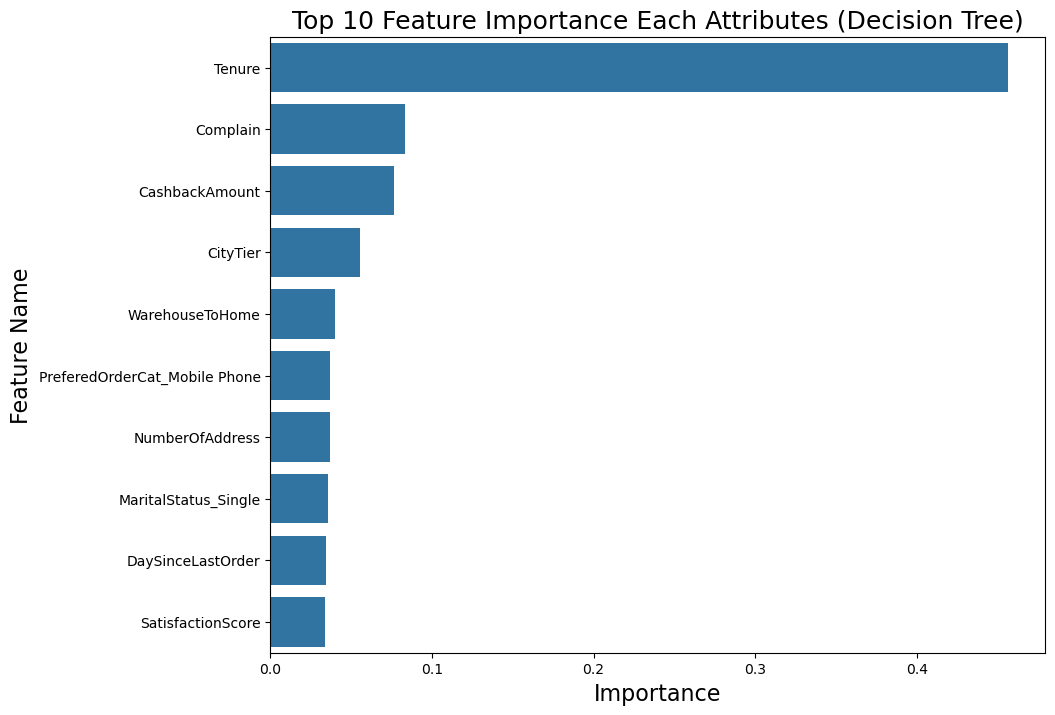

In [422]:
imp_df = pd.DataFrame({
    "Feature Name": X_encoded.columns,
    "Importance": final_tree_model.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

#### 4. Customer Segmentation for Churn Prediction

In [424]:
X_test_baseline['Risk Group'] = y_pred  # Append the risk group (1 = High risk, 0 = Low risk)
high_risk_customers = X_test_baseline[X_test_baseline['Risk Group'] == 1]  # Filter for high-risk customers
low_risk_customers = X_test_baseline[X_test_baseline['Risk Group'] == 0]   # Filter for low-risk customers

#### 5. Predictive Analysis of Customer Churn Characteristics

In [426]:
# Step 1: Ensure to apply the same one-hot encoding to the test data
X_test_encoded = pd.get_dummies(X_test_baseline, drop_first=True)

# Step 2: Align the columns of X_test_encoded with X_encoded (the training data)
X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Step 3: Predict churn using the correctly formatted test data
y_pred = final_tree_model.predict(X_test_encoded)

# Step 4: Create a DataFrame with CustomerID, Predictions (Risk Group), and selected features
results_df = pd.DataFrame({
    'CustomerID': X_test_baseline['CustomerID'],  # Assuming CustomerID is part of your test data
    'Churn Prediction': y_pred,  # 1 = High risk (churn), 0 = Low risk (no churn)
    'Tenure': X_test_baseline['Tenure'],
    'Complain': X_test_baseline['Complain'],
    'Cashback Amount': X_test_baseline['CashbackAmount'],
    'Order Count': X_test_baseline['OrderCount'],
    'Days Since Last Order': X_test_baseline['DaySinceLastOrder']
})

# Step 5: Print or display the result
print(results_df.head())

      CustomerID  Churn Prediction  Tenure  Complain  Cashback Amount  \
4331       54332                 1     1.0         0              148   
1988       51989                 0    15.0         1              152   
3443       53444                 0    13.0         1              234   
4559       54560                 0     5.0         0              147   
4898       54899                 0    13.0         0              252   

      Order Count  Days Since Last Order  
4331          2.0                    1.0  
1988          1.0                    3.0  
3443          2.0                    9.0  
4559          4.0                    3.0  
4898          2.0                    9.0  


#### 6. Store Data from DT model for churn prediction in CSV file 

In [428]:
results_df.to_csv('DT_Churn_Pred.csv', index=False)

#### 7. Visualiztion of Churn Prediction

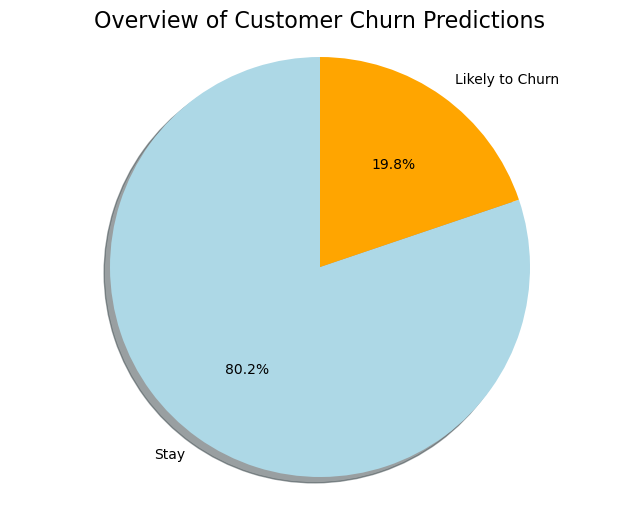

In [430]:
# Count the number of customers in each category
churn_counts = results_df['Churn Prediction'].value_counts()

# Define labels and colors
labels = ['Stay', 'Likely to Churn']
colors = ['lightblue', 'orange']  # Colors specified in your code

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Overview of Customer Churn Predictions', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# Model 2. Logistic Regression

### In LR model we have followed the following steps:
1. Trained LR model on E-commerce data and predicted customer churn on test data
2. Checked Accuracy of the model
3. Confusion Matrix
4. Predictive Analysis of Customer Churn Characteristics using LR model
5. Store Data from lr model for churn prediction in CSV file
6. Visualization of Churn Prediction

#### 1. Trained LR model on E-commerce data and predicted customer churn on test data 
#### 2. Checked Accuracy of the model

In [434]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_baseline, y_train_baseline)

LogisticRegression(random_state=0)

In [507]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = X_encoded  # Features after encoding
y = y_baseline  # Target variable

# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Logistic Regression model
baseline_logistic_model = LogisticRegression()  # Adjust parameters as necessary
baseline_logistic_model.fit(X_train, y_train)

# Step 3: Make predictions
baseline_logistic_prediction = baseline_logistic_model.predict(X_test)

# Step 4: Calculate the accuracy score
baseline_logistic_score = accuracy_score(y_test, baseline_logistic_prediction)

# Step 5: Print the score
print(f'Score is: {baseline_logistic_score:.2f}')

Score is: 0.84


In [436]:
print("X_test shape:", X_baseline.shape)
print("y_test shape:", y_baseline.shape)

X_test shape: (5630, 19)
y_test shape: (5630, 1)


In [437]:
print(classification_report(y_test_baseline, baseline_logistic_prediction))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       941
           1       0.58      0.20      0.30       185

    accuracy                           0.84      1126
   macro avg       0.72      0.59      0.60      1126
weighted avg       0.81      0.84      0.81      1126



#### 3. Confusion Matrix

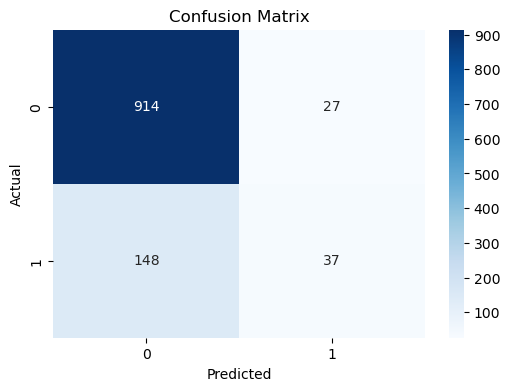

Test Data Accuracy: 0.8446


In [509]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Build the confusion matrix
cm = confusion_matrix(y_test_baseline, baseline_logistic_prediction)
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))

# Plotting the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')  # Added a color map for better visualization
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print test data accuracy
test_accuracy = accuracy_score(y_test_baseline, baseline_logistic_prediction)
print("Test Data Accuracy: %.4f" % test_accuracy)

#### 4. Predictive Analysis of Customer Churn Characteristics using LR model

In [515]:
# Step 1: Prepare features and target variable
X = data[['CustomerID', 'Tenure', 'Complain', 'CashbackAmount', 'OrderCount', 'DaySinceLastOrder']]
y = data['Churn']  # Assuming this is your target variable

# Step 2: One-hot encoding (if needed)
X_encoded = pd.get_dummies(X, drop_first=True)  # Encode categorical features

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 4: Train the Logistic Regression model
baseline_logistic_model = LogisticRegression()  # Adjust parameters as necessary
baseline_logistic_model.fit(X_train.drop(columns=['CustomerID']), y_train)  # Drop CustomerID for training

# Step 5: Make predictions
baseline_logistic_prediction = baseline_logistic_model.predict(X_test.drop(columns=['CustomerID']))  # Drop CustomerID for testing

# Step 6: Calculate the accuracy score
baseline_logistic_score = accuracy_score(y_test, baseline_logistic_prediction)

# Step 7: Print the score
print(f'Score is: {baseline_logistic_score:.2f}')

Score is: 0.87


#### 5. Store Data from lr model for churn prediction in CSV file

In [443]:
# Step 8: Create a DataFrame to store predictions and original feature values
results_df = X_test.copy()  # Start with a copy of the test set
results_df['Churn Prediction'] = baseline_logistic_prediction  # Add the predictions

# Step 9: Save results to CSV
results_df.to_csv('LR_Churn_Pred.csv', index=False, columns=['CustomerID', 'Churn Prediction', 'Tenure', 'Complain', 'CashbackAmount', 'OrderCount', 'DaySinceLastOrder'])

#### 6. Visualization of Churn Prediction

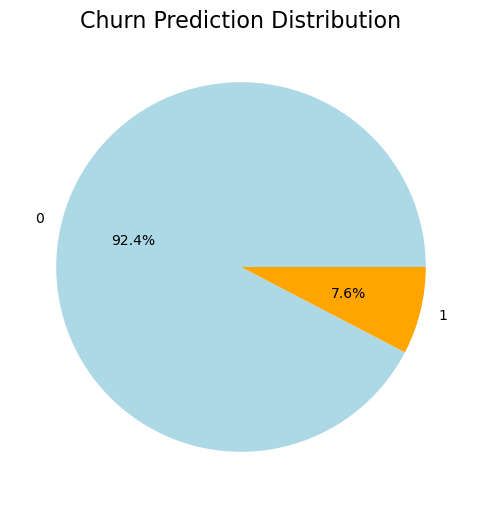

In [445]:
# Step 10: Pie chart for overall churn prediction
plt.figure(figsize=(8, 6))
results_df['Churn Prediction'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Churn Prediction Distribution', fontsize=16)
plt.ylabel('')  # Hide the y-label
plt.show()

# Summary

| **Key Features**         | **Churn Characteristics**                                                                                                                                       | **Retention Recommendations**                                                                                                      |
|--------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------|
| Tenure                   | Shorter tenure increases churn risk                                                                                                                             | Target customers with short tenure with personalized offers and incentives                                                         |
| Complain                 | Customers with complaints are more likely to churn                                                                                                              | Improve customer service and resolve complaints quickly to boost satisfaction                                                      |
| Cashback Amount          | Higher cashback amounts reduce churn risk                                                                                                                       | Enhance cashback programs for low-engagement customers to increase loyalty                                                         |
| Order Count              | Lower order counts increase churn risk                                                                                                                          | Increase engagement through personalized marketing for customers with lower order counts                                           |
| Days Since Last Order    | Longer inactivity periods (days since last order) increase churn risk                                                                                           | Re-engage dormant customers with targeted offers and discounts                                                                     |
| Churn Distribution       | Original data: 16.8% churned, 83.2% stayed<br>DT model: 19.8% churned, 80.2% stayed<br>LR model: 7.6% churned, 92.4% stayed                                      | Focus on customers predicted to churn to provide tailored offers and improve retention strategies                                   |
| Model Performance        | DT accuracy: 92%<br>LR accuracy: 84%                                                                                                                            | Consider combining the insights from both models to optimize prediction and customer engagement efforts                            |